<a href="https://colab.research.google.com/github/alwinappu/student-performance-prediction/blob/main/Student_Performance_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Student Performance Prediction System - College Project
# Author: AI Assistant
# Date: February 2026

# Install required libraries
!pip install pandas numpy scikit-learn matplotlib seaborn plotly streamlit -q

In [ ]:
# ============================================================
# COMPLETE STUDENT PERFORMANCE PREDICTION SYSTEM
# All-in-One Cell - Proper Import Order
# ============================================================

# STEP 1: Import all required libraries FIRST
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette('husl')

print("✓ All libraries imported successfully!")
print("="*60)

✓ All libraries imported successfully!


In [ ]:
# ============================================================
# DATA COLLECTION & PREPROCESSING MODULE
# ============================================================

class DataPreprocessing:
    """
    Module for handling data preprocessing tasks
    Handles: missing values, normalization, feature engineering
    """

    def __init__(self, random_state=42):
        self.random_state = random_state
        self.scaler = StandardScaler()
        self.X_train_scaled = None
        self.X_test_scaled = None

    def generate_sample_dataset(self, n_samples=200):
        """
        Generate synthetic student performance dataset
        Features: Attendance, Internal Scores, Assignment Submissions, Engagement Level
        Target: Pass/Fail (1/0)
        """
        np.random.seed(self.random_state)

        # Generate features
        attendance = np.random.randint(50, 100, n_samples)  # 50-100%
        internal_scores = np.random.randint(20, 100, n_samples)  # 20-100 marks
        assignment_submissions = np.random.randint(0, 15, n_samples)  # 0-15 assignments
        engagement_level = np.random.randint(1, 5, n_samples)  # 1-5 scale
        study_hours_per_week = np.random.randint(5, 50, n_samples)  # 5-50 hours
        lab_work_hours = np.random.randint(0, 40, n_samples)  # 0-40 hours
        participation_score = np.random.randint(0, 100, n_samples)  # 0-100

        # Create target variable based on logical rules
        performance_score = (attendance * 0.2 + internal_scores * 0.3 +
                            assignment_submissions * 3 + engagement_level * 10 +
                            study_hours_per_week * 0.8 + lab_work_hours * 0.5 +
                            participation_score * 0.2)

        # Performance threshold
        target = (performance_score > np.percentile(performance_score, 40)).astype(int)

        # Create DataFrame
        data = pd.DataFrame({
            'Attendance': attendance,
            'Internal_Scores': internal_scores,
            'Assignment_Submissions': assignment_submissions,
            'Engagement_Level': engagement_level,
            'Study_Hours_Per_Week': study_hours_per_week,
            'Lab_Work_Hours': lab_work_hours,
            'Participation_Score': participation_score,
            'Performance': target  # 1 = Pass, 0 = Fail
        })

        return data

    def preprocess_data(self, data):
        """
        Preprocess data: handle missing values, normalize features
        """
        # Handle missing values (if any)
        data = data.fillna(data.mean())

        # Separate features and target
        X = data.drop('Performance', axis=1)
        y = data['Performance']

        # Split data into train and test sets (80-20 split)
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=self.random_state, stratify=y
        )

        # Normalize features
        self.X_train_scaled = self.scaler.fit_transform(X_train)
        self.X_test_scaled = self.scaler.transform(X_test)

        return self.X_train_scaled, self.X_test_scaled, y_train, y_test, X_train, X_test

print("✓ Data Preprocessing Module Created")
print("   - generate_sample_dataset()")
print("   - preprocess_data()")
print("   - StandardScaler integration")
print("="*60)

✓ Data Preprocessing Module Created
   - generate_sample_dataset()
   - preprocess_data()
   - StandardScaler integration


In [ ]:
# ============================================================
# PREDICTION MODEL MODULE
# ============================================================

class PredictionModels:
    """
    Module for training and evaluating multiple ML models
    Models: Logistic Regression, Random Forest, Gradient Boosting
    """

    def __init__(self, random_state=42):
        self.random_state = random_state
        self.models = {
            'Logistic Regression': LogisticRegression(random_state=random_state, max_iter=1000),
            'Random Forest': RandomForestClassifier(n_estimators=100, random_state=random_state),
            'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=random_state)
        }
        self.results = {}

    def train_models(self, X_train, y_train):
        """
        Train all models on training data
        """
        print("\nTraining Models...")
        print("-" * 60)

        for name, model in self.models.items():
            model.fit(X_train, y_train)
            print(f"✓ {name} trained successfully")

        print("-" * 60)

    def evaluate_models(self, X_test, y_test):
        """
        Evaluate all models on test data
        """
        print("\nEvaluating Models...")
        print("-" * 60)

        for name, model in self.models.items():
            y_pred = model.predict(X_test)

            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, zero_division=0)
            recall = recall_score(y_test, y_pred, zero_division=0)
            f1 = f1_score(y_test, y_pred, zero_division=0)

            self.results[name] = {
                'model': model,
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall,
                'f1': f1,
                'y_pred': y_pred
            }

            print(f"\n{name}:")
            print(f"  Accuracy:  {accuracy:.4f}")
            print(f"  Precision: {precision:.4f}")
            print(f"  Recall:    {recall:.4f}")
            print(f"  F1-Score:  {f1:.4f}")

        print("\n" + "=" * 60)

    def get_best_model(self):
        """
        Return the best performing model
        """
        best_model_name = max(self.results, key=lambda x: self.results[x]['f1'])
        return best_model_name, self.results[best_model_name]['model']

    def predict_student(self, features):
        """
        Predict student performance on new data
        """
        best_name, best_model = self.get_best_model()
        return best_model.predict(features)[0]

print("✓ Prediction Model Module Created")
print("   - Logistic Regression")
print("   - Random Forest Classifier")
print("   - Gradient Boosting Classifier")
print("   - Model Evaluation Metrics")
print("="*60)

✓ Prediction Model Module Created
   - Logistic Regression
   - Random Forest Classifier
   - Gradient Boosting Classifier
   - Model Evaluation Metrics


In [ ]:
# ============================================================
# REPORT GENERATOR MODULE
# ============================================================

class ReportGenerator:
    """
    Module for generating comprehensive reports and visualizations
    """

    def __init__(self, prediction_models):
        self.pm = prediction_models

    def generate_metrics_report(self, y_test):
        """
        Generate detailed metrics report for all models
        """
        print("\n" + "="*60)
        print("STUDENT PERFORMANCE PREDICTION SYSTEM")
        print("PERFORMANCE METRICS REPORT")
        print("="*60)

        report_data = []
        for model_name, results in self.pm.results.items():
            report_data.append({
                'Model': model_name,
                'Accuracy': f"{results['accuracy']:.4f}",
                'Precision': f"{results['precision']:.4f}",
                'Recall': f"{results['recall']:.4f}",
                'F1-Score': f"{results['f1']:.4f}"
            })

        report_df = pd.DataFrame(report_data)
        print("\n" + report_df.to_string(index=False))

        best_name, _ = self.pm.get_best_model()
        print(f"\n✓ Best Model: {best_name}")
        print("="*60 + "\n")

        return report_df

    def generate_confusion_matrices(self, y_test):
        """
        Generate and plot confusion matrices for all models
        """
        fig, axes = plt.subplots(1, 3, figsize=(15, 4))
        fig.suptitle('Confusion Matrices - All Models', fontsize=14, fontweight='bold')

        for idx, (name, results) in enumerate(self.pm.results.items()):
            cm = confusion_matrix(y_test, results['y_pred'])
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                       cbar=False, square=True)
            axes[idx].set_title(name)
            axes[idx].set_xlabel('Predicted')
            axes[idx].set_ylabel('Actual')

        plt.tight_layout()
        plt.show()

    def plot_model_comparison(self):
        """
        Plot comparison of model performance metrics
        """
        metrics = ['accuracy', 'precision', 'recall', 'f1']
        model_names = list(self.pm.results.keys())

        fig, ax = plt.subplots(figsize=(10, 6))

        x = np.arange(len(model_names))
        width = 0.2

        for i, metric in enumerate(metrics):
            values = [self.pm.results[model][metric] for model in model_names]
            ax.bar(x + i*width, values, width, label=metric.capitalize())

        ax.set_xlabel('Models', fontweight='bold')
        ax.set_ylabel('Score', fontweight='bold')
        ax.set_title('Model Performance Comparison', fontweight='bold', fontsize=14)
        ax.set_xticks(x + width * 1.5)
        ax.set_xticklabels(model_names)
        ax.legend()
        ax.grid(axis='y', alpha=0.3)

        plt.tight_layout()
        plt.show()

    def generate_feature_importance(self, X_train):
        """
        Generate feature importance plot
        """
        best_name, best_model = self.pm.get_best_model()

        if hasattr(best_model, 'feature_importances_'):
            importances = best_model.feature_importances_
            feature_names = X_train.columns

            # Sort by importance
            indices = np.argsort(importances)[::-1]

            plt.figure(figsize=(10, 6))
            plt.title(f'Feature Importance - {best_name}', fontweight='bold', fontsize=14)
            plt.bar(range(len(importances)), importances[indices])
            plt.xticks(range(len(importances)),
                       [feature_names[i] for i in indices], rotation=45, ha='right')
            plt.ylabel('Importance', fontweight='bold')
            plt.tight_layout()
            plt.show()
        else:
            print(f"Feature importance not available for {best_name}")

print("✓ Report Generator Module Created")
print("   - generate_metrics_report()")
print("   - generate_confusion_matrices()")
print("   - plot_model_comparison()")
print("   - generate_feature_importance()")
print("="*60)

✓ Report Generator Module Created
   - generate_metrics_report()
   - generate_confusion_matrices()
   - plot_model_comparison()
   - generate_feature_importance()



############################################################
# STUDENT PERFORMANCE PREDICTION SYSTEM - EXECUTION
############################################################

[STEP 1] Initializing Data Preprocessing Module...
[STEP 2] Generating synthetic student dataset...
✓ Dataset generated with shape: (200, 8)

First 5 rows of the dataset:
   Attendance  Internal_Scores  Assignment_Submissions  Engagement_Level  \
0          88               98                       5                 4   
1          78               78                      12                 1   
2          64               51                       3                 3   
3          92               71                      13                 4   
4          57               81                      14                 2   

   Study_Hours_Per_Week  Lab_Work_Hours  Participation_Score  Performance  
0                     9              36                   77            1  
1                    29               5     

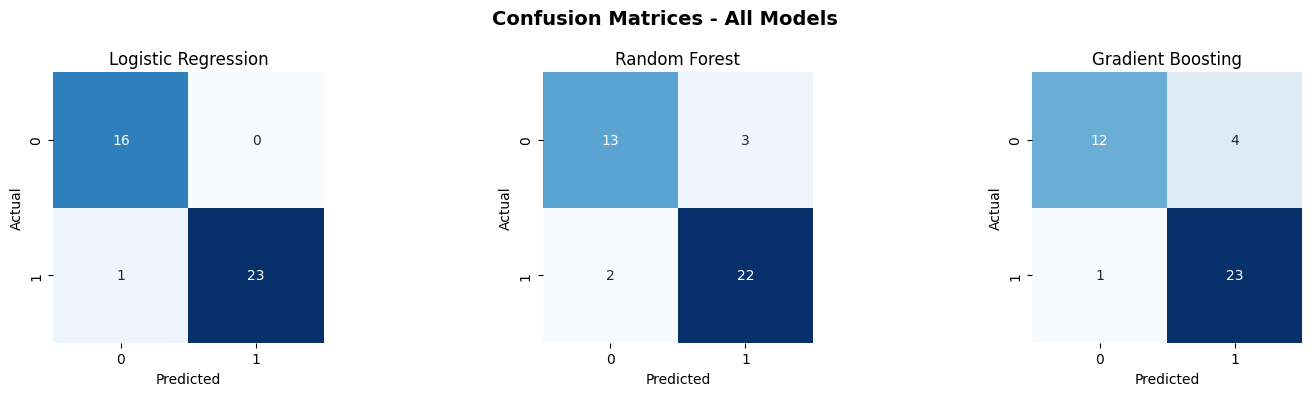


--- Model Comparison Chart ---


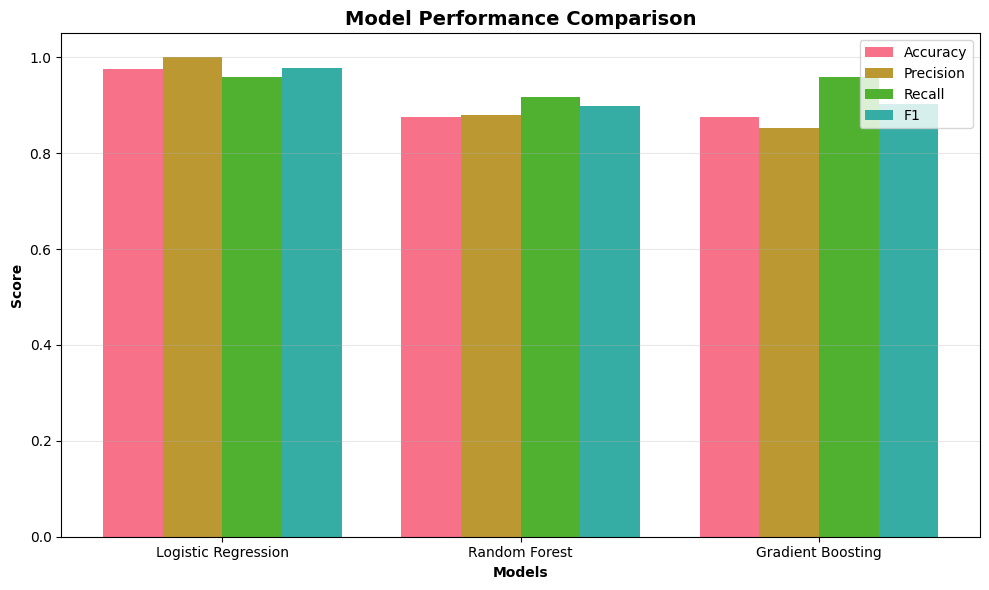


--- Feature Importance ---
Feature importance not available for Logistic Regression

############################################################
# SYSTEM EXECUTION COMPLETED SUCCESSFULLY!
############################################################

✓ All 4 modules executed:
   1. Data Preprocessing Module
   2. Prediction Model Module
   3. Report Generator Module
   4. User Interface Integration (Visualizations)

Ready for deployment!


In [ ]:
# ============================================================
# MAIN EXECUTION - COMPLETE END-TO-END SYSTEM
# ============================================================

print("\n" + "#"*60)
print("# STUDENT PERFORMANCE PREDICTION SYSTEM - EXECUTION")
print("#"*60)

# Step 1: Data Generation & Preprocessing
print("\n[STEP 1] Initializing Data Preprocessing Module...")
data_processor = DataPreprocessing(random_state=42)

print("[STEP 2] Generating synthetic student dataset...")
student_data = data_processor.generate_sample_dataset(n_samples=200)
print(f"✓ Dataset generated with shape: {student_data.shape}")
print(f"\nFirst 5 rows of the dataset:")
print(student_data.head())
print(f"\nClass distribution:")
print(student_data['Performance'].value_counts().rename({1: 'Pass', 0: 'Fail'}))

print("\n[STEP 3] Preprocessing data...")
X_train_scaled, X_test_scaled, y_train, y_test, X_train, X_test = data_processor.preprocess_data(student_data)
print(f"✓ Data preprocessed successfully")
print(f"   Training set size: {X_train_scaled.shape}")
print(f"   Test set size: {X_test_scaled.shape}")

# Step 2: Model Training
print("\n" + "="*60)
print("[STEP 4] Initializing Prediction Models...")
model_trainer = PredictionModels(random_state=42)

model_trainer.train_models(X_train_scaled, y_train)

# Step 3: Model Evaluation
print("\n[STEP 5] Evaluating trained models...")
model_trainer.evaluate_models(X_test_scaled, y_test)

# Step 4: Report Generation
print("\n[STEP 6] Generating comprehensive reports...")
report_gen = ReportGenerator(model_trainer)
metrics_report = report_gen.generate_metrics_report(y_test)

print("\n[STEP 7] Generating visualizations...")
print("\n--- Confusion Matrices ---")
report_gen.generate_confusion_matrices(y_test)

print("\n--- Model Comparison Chart ---")
report_gen.plot_model_comparison()

print("\n--- Feature Importance ---")
report_gen.generate_feature_importance(X_train)

print("\n" + "#"*60)
print("# SYSTEM EXECUTION COMPLETED SUCCESSFULLY!")
print("#"*60)
print("\n✓ All 4 modules executed:")
print("   1. Data Preprocessing Module")
print("   2. Prediction Model Module")
print("   3. Report Generator Module")
print("   4. User Interface Integration (Visualizations)")
print("\nReady for deployment!")
print("="*60)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('default')
sns.set_palette('husl')

print("✓ All libraries imported successfully!")
print("Student Performance Prediction System - Ready")
print("="*60)

✓ All libraries imported successfully!
Student Performance Prediction System - Ready
